# Project TAI: Evaluation of Edge Computing

## Preview

## Imoprts

In [19]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import librosa

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras import optimizers

In [9]:
plt.style.use(['dark_background'])

## Path

In [21]:
buswav = Path.cwd()/"bus.wav"

## Data

In [22]:
y,sr = librosa.load(buswav)

In [23]:
y, sr

(array([-0.018068, -0.018648, -0.012953, -0.012196, ..., -0.025696, -0.024095, -0.025067, -0.01537 ], dtype=float32),
 22050)

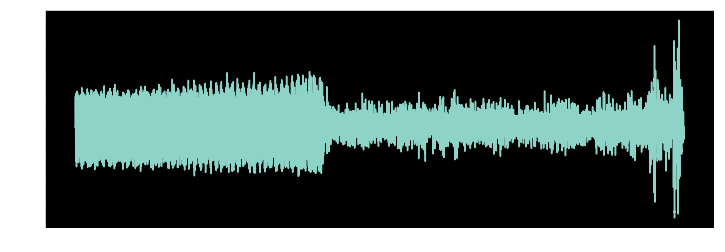

In [24]:
plt.figure(figsize=(12,4))
plt.plot(y);

In [28]:
# Load audio file as a floating point time series
y, SR = librosa.load(buswav, sr=sr, mono=True, dtype=np.float32)
#y = np.load(TEST_PATH)
# Slice into overlapping frames
frames = librosa.util.frame(y, frame_length=1024, hop_length=512)

In [30]:
frames.shape

(1024, 1290)

## Model

In [25]:
def cnnModel():
    model = Sequential()
    # adding the first convolutionial layer with 32 filters and 5 by 5 kernal size, using the rectifier as the activation function
    model.add(Conv2D(numFilters, (kernalSize1,kernalSize1),input_shape=(numOfRows, numOfColumns,1),activation='relu'))
    # adding a maxpooling layer
    model.add(MaxPooling2D(pool_size=(poolingWindowSz,poolingWindowSz),padding='valid'))
    # adding a dropout layer for the regularization and avoiding over fitting
    model.add(Dropout(dropOutRatio))
    # flattening the output in order to apply the fully connected layer
    model.add(Flatten())
    # adding first fully connected layer with 256 outputs
    model.add(Dense(numNueronsFCL1, activation='relu'))
    #adding second fully connected layer 128 outputs
    model.add(Dense(numNueronsFCL2, activation='relu'))
    # adding softmax layer for the classification
    model.add(Dense(numClasses, activation='softmax'))
    # Compiling the model to generate a model
    adam = optimizers.Adam(lr = 0.001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [26]:
model = cnnModel()

NameError: name 'numFilters' is not defined

In [ ]:
for layer in model.layers:
    print(layer.name)
model.fit(trainX,trainY, validation_split=1-trainSplitRatio,epochs=10,batch_size=batchSize,verbose=2)
score = model.evaluate(testX,testY,verbose=2)
print('Baseline Error: %.2f%%' %(100-score[1]*100))
model.save('model.h5')
np.save('groundTruth.npy',testY)
np.save('testData.npy',testX) 

## Todos
- [ ] Load ASC model
- [ ] Remove the dense layers and add custom_head
- [ ] Freeze to train the custom_head
- [ ] Unfreeze to train the whole model
- [ ] See the performance

In [1]:
asc_model = keras.models.load_model('./Session_keras_mod_93_Model.h5')

NameError: name 'keras' is not defined

In [5]:
asc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 30, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 15, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 15, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 13, 16)        2320      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
__________

In [33]:
for l in asc_model.layers:
    print(f"{l.get_config()}\n")

{'name': 'conv2d_11', 'trainable': True, 'batch_input_shape': (None, 30, 32, 1), 'dtype': 'float32', 'filters': 16, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None, 'dtype': 'float32'}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}

{'name': 'max_pooling2d_11', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}

{'name': 'dropout_16', 'trainable': True, 'dtype': 'float32', 'rate': 0.5, 'noise_shape': None, 'seed': None}

{'name': 'conv2d_12', 'trainable': True, 'dtype': 'float32', 'filters': 16, 

In [21]:
l = asc_model.layers[0]

In [28]:
l.get_config()

{'name': 'conv2d_11',
 'trainable': True,
 'batch_input_shape': (None, 30, 32, 1),
 'dtype': 'float32',
 'filters': 16,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'scale': 1.0,
   'mode': 'fan_avg',
   'distribution': 'uniform',
   'seed': None,
   'dtype': 'float32'}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {'dtype': 'float32'}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [30]:
l.kernel_size, l.filters, l.strides, l.padding

((3, 3), 16, (1, 1), 'valid')

In [19]:
SR = 16000
N_FFT = 1024
N_MELS = 30

In [20]:
wav_filename = Path.cwd()/"bus.wav"

In [21]:
# Load audio file as a floating point time series
y, _ = librosa.load(wav_filename, sr=SR, mono=True, dtype=np.float32)
#y = np.load(TEST_PATH)
# Slice into overlapping frames
frames = librosa.util.frame(y[:16896], frame_length=1024, hop_length=512)

In [28]:
nb_features = int(frames.shape[1] / 32)
S_log_mel = np.empty((nb_features, 30, 32), dtype=np.float32, order='C')                                                                                                                                             

for i in range(0, nb_features):
    frame = frames[:, 0 + i:32 + i]
    S_log_mel[i] = feature_extraction(frame)

AttributeError: 'function' object has no attribute 'fft'

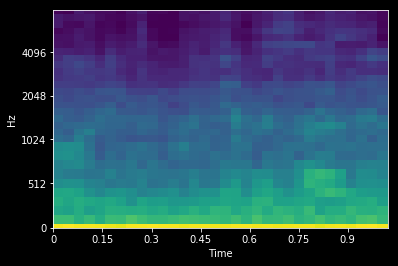

In [369]:
librosa.display.specshow(S_log_mel[0], sr=SR, y_axis='mel', fmax=8000,
                         x_axis='time', cmap='viridis')

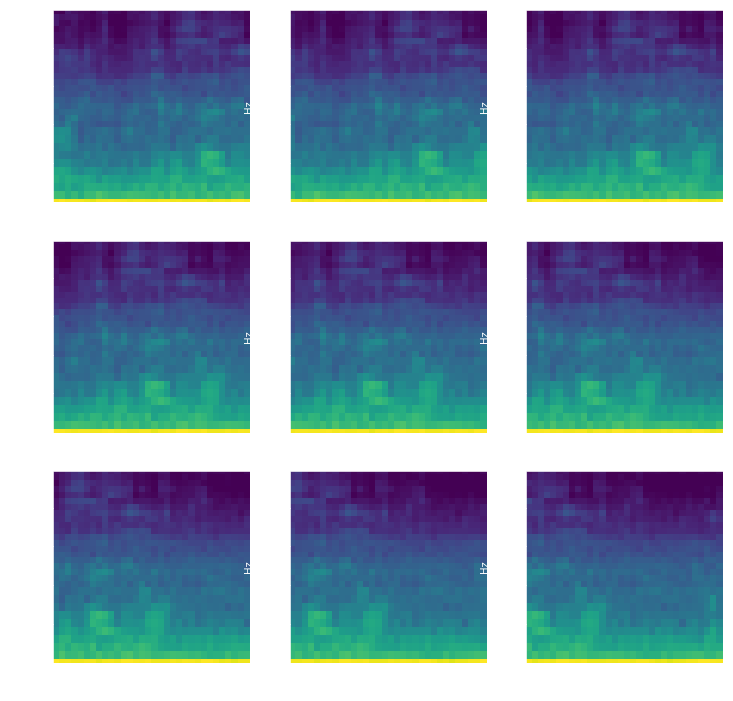

In [100]:
for i,ax in plot_flat(3,3,figsize=(12,12)):
    librosa.display.specshow(S_log_mel[i*3], sr=SR, y_axis='mel', fmax=8000,
                         x_axis='time', cmap='viridis', ax=ax)

In [348]:
#export
def create_col(y):
    assert y.shape == (1024,)

    # Create time-series window
    fft_window = librosa.filters.get_window('hann', N_FFT, fftbins=True)
    assert fft_window.shape == (1024,), fft_window.shape

    # Hann window
    y_windowed = fft_window * y
    assert y_windowed.shape == (1024,), y_windowed.shape

    # FFT
    fft_out = fft.fft(y_windowed, axis=0)[:513]
    assert fft_out.shape == (513,), fft_out.shape

    # Power spectrum
    S_pwr = np.abs(fft_out)**2

    assert S_pwr.shape == (513,)

    # Generation of Mel Filter Banks
    mel_basis = librosa.filters.mel(SR, n_fft=N_FFT, n_mels=N_MELS, htk=False)
    assert mel_basis.shape == (30, 513)

    # Apply Mel Filter Banks
    S_mel = np.dot(mel_basis, S_pwr)
    S_mel.astype(np.float32)
    assert S_mel.shape == (30,)

    return S_mel
                                                                                                                                    
def feature_extraction(y):
    assert y.shape == (1024, 32)

    S_mel = np.empty((30, 32), dtype=np.float32, order='C')
    for col_index in range(0, 32):
        S_mel[:, col_index] = create_col(y[:, col_index])

    # Scale according to reference power
    S_mel = S_mel / S_mel.max()
    # Convert to dB
    S_log_mel = librosa.power_to_db(S_mel, top_db=80.0)
    assert S_log_mel.shape == (30, 32)

    return S_log_mel

In [ ]:
# Extract features from overlapping frames (drop end-of-file samples)
# S_log_Mel[0] = first feature (30x32) matrix
# S_log_Mel[1] = second feature (30x32) matrix
# ...
nb_features = int(frames.shape[1] / 32)
S_log_mel = np.empty((nb_features, 30, 32), dtype=np.float32, order='C')
for i in range(0, nb_features):
    frame = frames[:, 0 + i:32 + i]
    S_log_mel[i] = feature_extraction(frame)

# Plot first feature/spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_log_mel[0], sr=SR, y_axis='mel', fmax=8000,
                         x_axis='time', cmap='viridis')
# plt.pcolormesh(S_log_Mel[0])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

plt.show()

In [45]:
from pyts.image import GramianAngularField, MarkovTransitionField, RecurrencePlot
from pyts.preprocessing import StandardScaler

In [46]:
ts2image(tt[0])

TypeError: encode_img() got an unexpected keyword argument 'n_bins'

array([1270., 1272., 1273., 1273., ..., 1352., 1352., 1352., 1352.])

In [78]:
# Recurrence plots are a visualization tool for (multivariate) time-series.
# modified from https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
def recurrence_matrix(s, eps=0.1, steps=10, metric="euclidean"):
    d = pairwise.pairwise_distances(s, metric=metric)
    d = np.floor(d / eps)
    d[d > steps] = steps
    # Z = squareform(d)
    return d

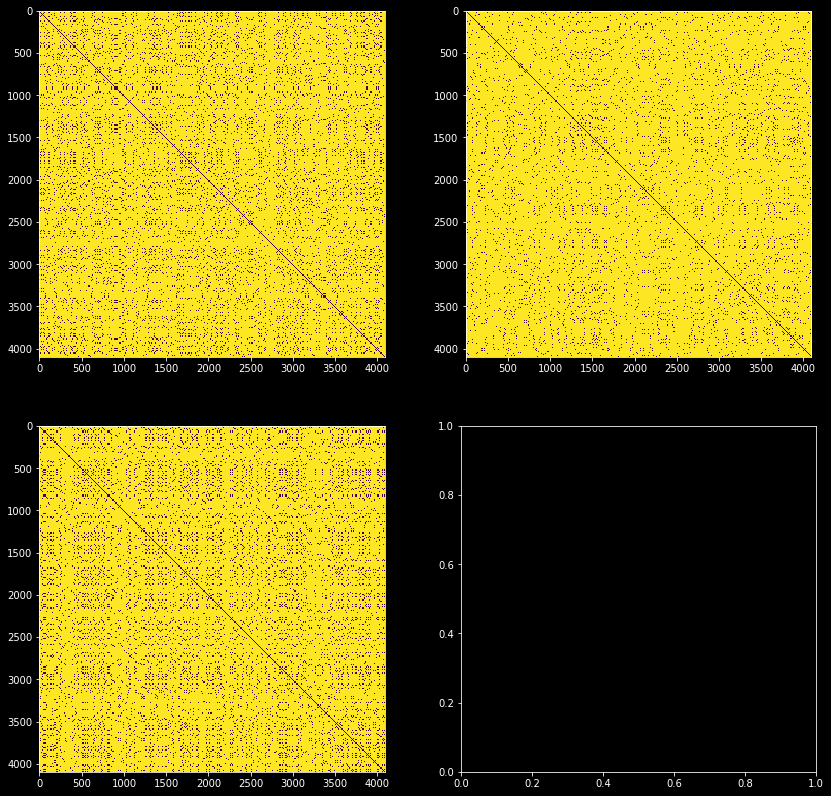

In [91]:
summ,sr = 0,4096
for i,ax in plot_flat(2,2,figsize=(14,14)):
    if i<=2: ax.imshow(recurrence_matrix(tt[i][:,None]))